In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\Zalo Received Files\HaNoi.csv")

df.set_index('Index', inplace=True) # Đặt cột dateNunmber làm index

def run(train_ratio, test_ratio):
    # Phân chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
    train_size = int(train_ratio * len(df))
    test_size = int(test_ratio * len(df))
    val_size = len(df) - train_size - test_size
    train_data = df[:train_size]
    test_data = df[train_size:train_size+test_size]
    val_data = df[train_size+test_size:]
    
    # Chuẩn bị dữ liệu đầu vào và đầu ra cho mô hình
    x_train = np.array(train_data.index).reshape(-1, 1)
    y_train = np.array(train_data['AQI'])
    
    
    # Khởi tạo và huấn luyện mô hình Linear Regression
    model = LinearRegression()
    model.fit(x_train, y_train)
    x_test = np.array(test_data.index.astype('int64')).reshape(-1, 1).astype('int32')
    y_test = np.array(test_data['AQI'])
    y_pred = model.predict(x_test)
    last_index =  df.index[-1]
    # Tính RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Tính MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
    x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
    y_next_30_days = model.predict(x_next_30_days)
    
    last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
    x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
    y_next_60_days = model.predict(x_next_60_days)
    
    last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
    x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
    y_next_90_days = model.predict(x_next_90_days)
    plt.plot(train_data.index, train_data['AQI'])
    plt.plot(test_data.index, test_data['AQI'])
    plt.plot(test_data.index, y_pred)
    plt.plot(last_data_30,y_next_30_days)
    plt.plot(last_data_60,y_next_60_days)
    plt.plot(last_data_90,y_next_90_days)
    plt.title(f'AQI Predictions Linear Regression - split {train_ratio * 10}:{test_ratio*10}')
    plt.legend(['Train', 'Test', 'Predict','Next30Day','Next60Day','Next90Day'])
    plt.show()

Root Mean Squared Error (RMSE): 64.77018187336999
Mean Absolute Error (MAE): 51.019981565490056


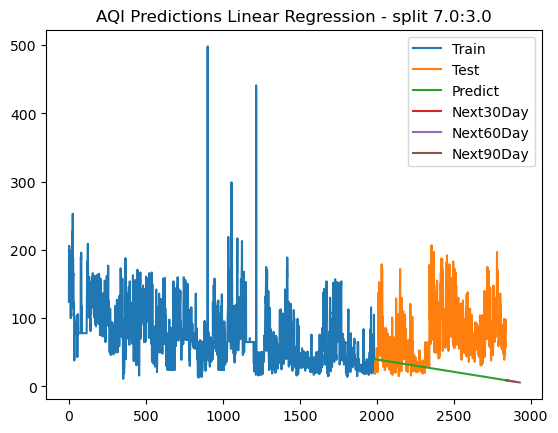

In [22]:
run(0.7,0.3)

Root Mean Squared Error (RMSE): 65.90467392885562
Mean Absolute Error (MAE): 54.56664872281005


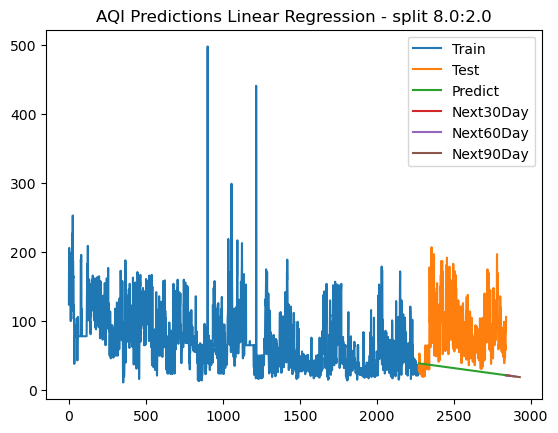

In [23]:
run(0.8,0.2)

Root Mean Squared Error (RMSE): 40.55464012983901
Mean Absolute Error (MAE): 30.327097843639333


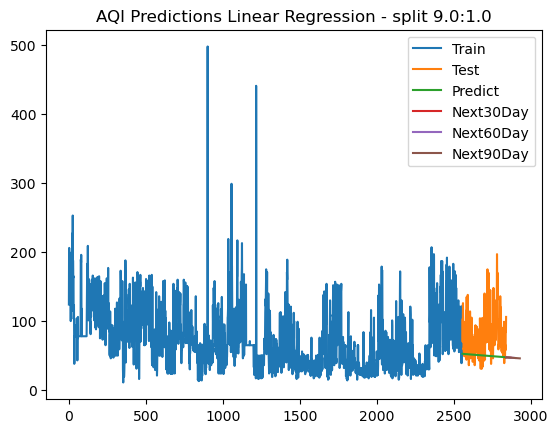

In [24]:
run(0.9,0.1)